In [117]:
# import libraries
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

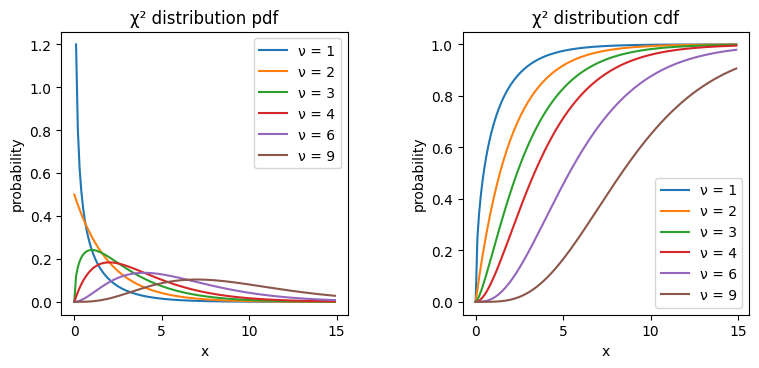

In [118]:
# chi2 distribution

x = np.arange(0,15,0.1)

nu = np.array([1,2,3,4,6,9])

fig,ax = plt.subplots(1,2)
for df in nu:
  chi2_pdf = stats.chi2.pdf(x,df)
  chi2_cdf = stats.chi2.cdf(x,df)
  ax[0].plot(x,chi2_pdf, label = '\u03BD = {}'.format(df))
  ax[1].plot(x,chi2_cdf, label = '\u03BD = {}'.format(df))

ax[0].set_title('\u03C7\u00b2 distribution pdf')
ax[1].set_title('\u03C7\u00b2 distribution cdf')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'lower right')

fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()


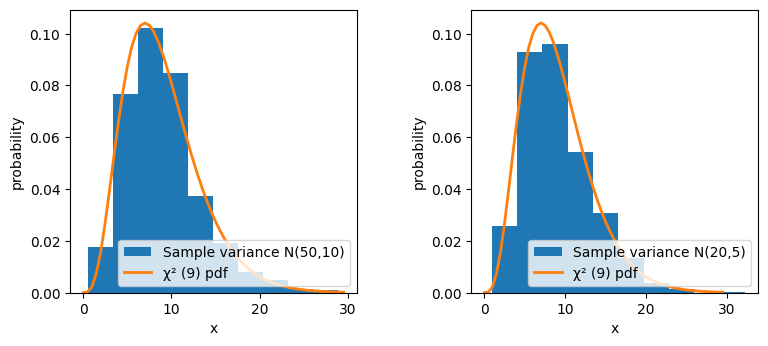

In [119]:
# simulation chi2 distribution

df = 9 

N = df+1
rand_norm_mu50_sd10 = stats.norm.rvs(50,10,size = (N,1000))
rand_norm_mu20_sd5 = stats.norm.rvs(20,5,size = (N,1000))

var_rand_norm_mu50_sd10 = rand_norm_mu50_sd10.var(axis=0,ddof=1)
var_rand_norm_mu20_sd5 = rand_norm_mu20_sd5.var(axis=0,ddof=1)

var_chi2_rand_norm_mu50_sd10 = var_rand_norm_mu50_sd10*df/10**2
var_chi2_rand_norm_mu20_sd5 = var_rand_norm_mu20_sd5*df/5**2

x = np.arange(0,30,0.5)
chi2_pdf = stats.chi2.pdf(x,df)

fig,ax = plt.subplots(1,2)
ax[0].hist(var_chi2_rand_norm_mu50_sd10, density = True, label = 'Sample variance N(50,10)')
ax[1].hist(var_chi2_rand_norm_mu20_sd5, density = True, label = 'Sample variance N(20,5)')
ax[0].plot(x,chi2_pdf, lw=2, label = '\u03C7\u00b2 ({}) pdf'.format(df))
ax[1].plot(x,chi2_pdf, lw=2, label = '\u03C7\u00b2 ({}) pdf'.format(df))
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')
ax[0].legend(loc = 'lower right')
ax[1].legend(loc = 'lower right')
fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()

In [120]:
# example 1

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/birthwt.csv'

data_full = pd.read_csv(url)

bwt = data_full.bwt/1000 # weight in kg

print(bwt)

0      2.523
1      2.551
2      2.557
3      2.594
4      2.600
       ...  
184    2.466
185    2.495
186    2.495
187    2.495
188    2.495
Name: bwt, Length: 189, dtype: float64


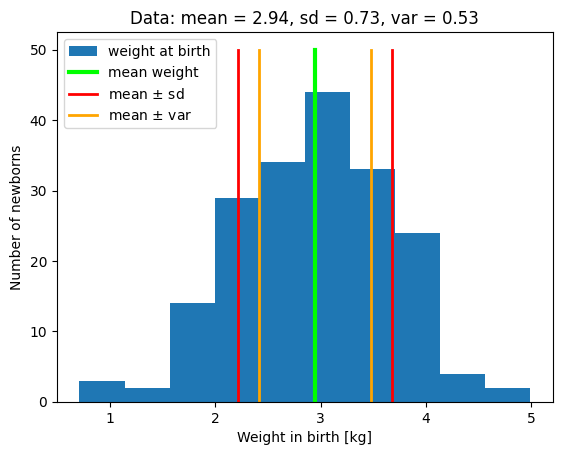

In [121]:
# present data and basic calculations

bwt_mean = bwt.mean()
bwt_var = bwt.var(ddof=1)
bwt_std = bwt.std(ddof=1)

plt.hist(bwt,label = 'weight at birth')
plt.plot([bwt_mean,bwt_mean], [0,50], color = 'lime', lw = 3, label = 'mean weight')
plt.plot([bwt_mean-bwt_std,bwt_mean-bwt_std], [0,50], color = 'red', lw = 2, label =  'mean $\pm$ sd')
plt.plot([bwt_mean+bwt_std,bwt_mean+bwt_std], [0,50], color = 'red', lw = 2)
plt.plot([bwt_mean-bwt_var,bwt_mean-bwt_var], [0,50], color = 'orange', lw = 2, label =  'mean $\pm$ var')
plt.plot([bwt_mean+bwt_var,bwt_mean+bwt_var], [0,50], color = 'orange', lw = 2)
plt.xlabel('Weight in birth [kg]')
plt.ylabel('Number of newborns')
plt.title('Data: mean = {}, sd = {}, var = {}'.format(round(bwt_mean,2), round(bwt_std,2),round(bwt_var,2)))
plt.legend(loc = 'upper left')
plt.show()

CI 95% for variance = [0.4282 , 0.6392]


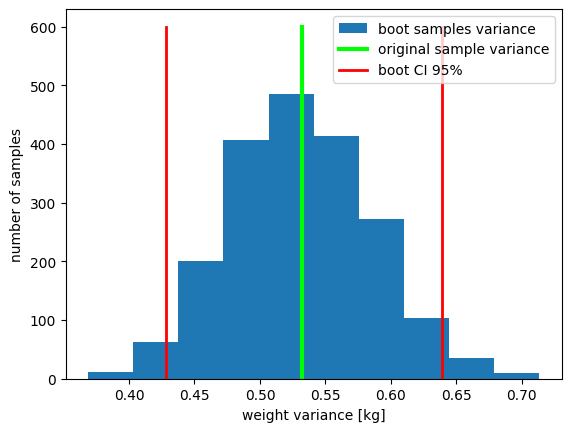

In [122]:
# estimate variance with regular bootstrap - cI 95%

N = len(bwt)
num_boots = 2000
boot_weights = np.random.choice(bwt,size = (N,num_boots))
boot_weights_var = boot_weights.var(axis=0, ddof=1)

ci95_boot = np.percentile(boot_weights_var,[2.5,97.5])

print('CI 95% for variance = [{} , {}]'.format(round(ci95_boot[0],4),round(ci95_boot[1],4)))

plt.hist(boot_weights_var, label = 'boot samples variance')
plt.plot([bwt_var,bwt_var], [0,600], color = 'lime', lw=3, label = 'original sample variance')
plt.plot([ci95_boot[0],ci95_boot[0]],[0,600],color = 'red', lw=2, label = 'boot CI 95%')
plt.plot([ci95_boot[1],ci95_boot[1]],[0,600],color = 'red',lw=2)
plt.xlabel('weight variance [kg]')
plt.ylabel('number of samples')
plt.legend()
plt.show()


In [125]:
# parametric CI 95% using chi2 distribution

N = len(bwt)
chi2_stat = stats.chi2.ppf([0.975,0.025],N-1)

CI95 = (N-1)*bwt_var/chi2_stat

print('CI 95% for variance = [{} , {}]'.format(round(CI95[0],4),round(CI95[1],4)))


CI 95% for variance = [0.4387 , 0.658]


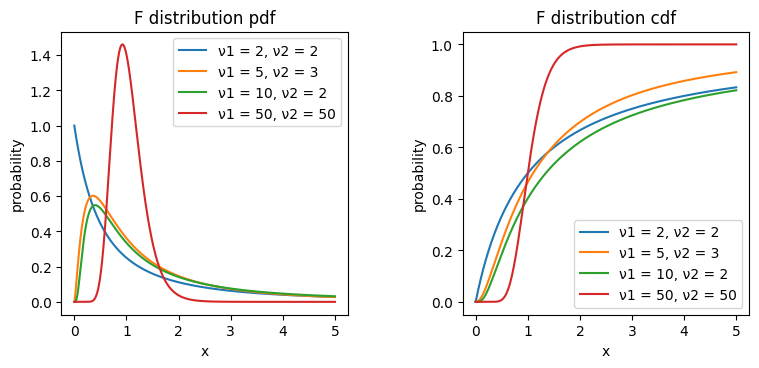

In [39]:
# F distribution

x = np.arange(0,5,0.001)

df1 = np.array([2,5,10,50])
df2 = np.array([2,3,2,50])


fig,ax = plt.subplots(1,2)
for n in range(len(df1)):
  f_pdf = stats.f.pdf(x, df1[n], df2[n])
  f_cdf = stats.f.cdf(x, df1[n], df2[n])
  ax[0].plot(x,f_pdf, label = '\u03BD1 = {}, \u03BD2 = {}'.format(df1[n],df2[n]))
  ax[1].plot(x,f_cdf, label = '\u03BD1 = {}, \u03BD2 = {}'.format(df1[n],df2[n]))

ax[0].set_title('F distribution pdf')
ax[1].set_title('F distribution cdf')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'lower right')

fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()

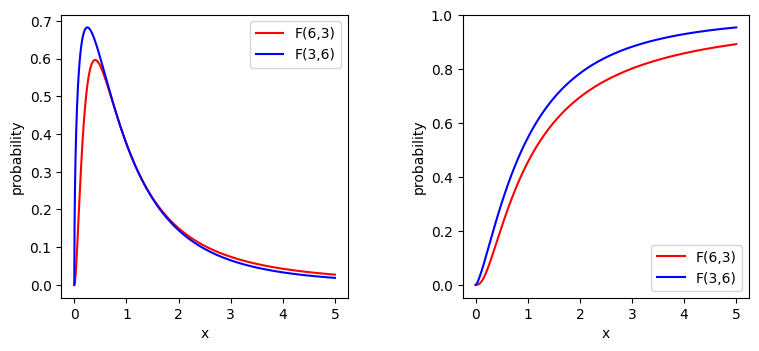

In [9]:
# example 
df1,df2 = 6,3

fig,ax = plt.subplots(1,2)
ax[0].plot(x , stats.f.pdf(x,df1,df2), color = 'red', label = 'F(6,3)')
ax[1].plot(x , stats.f.cdf(x,df1,df2), color = 'red', label = 'F(6,3)')
ax[0].plot(x , stats.f.pdf(x,df2,df1), color = 'blue', label = 'F(3,6)')
ax[1].plot(x , stats.f.cdf(x,df2,df1), color = 'blue', label = 'F(3,6)')

ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'lower right')

fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()

In [40]:
# example 2: compare variances of 2 groups

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/spikes2cells_part.csv'

data = pd.read_csv(url)

print(data)


   cell1  cell2
0      8      2
1      7      0
2      4      4
3      6      1
4      3      3
5      4      1
6      4      3
7      7      1
8      3      1
9      4      2


3.3333333333333335 1.5111111111111113


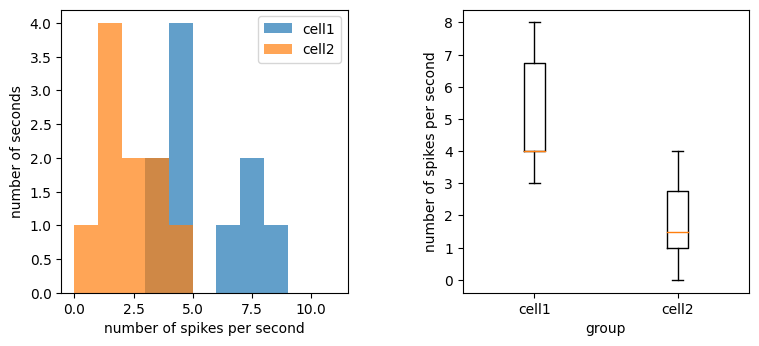

In [41]:
# presentation

cell1 = data.cell1
cell2 = data.cell2

cell1_var = cell1.var(ddof=1)
cell2_var = cell2.var(ddof=1)
print(cell1_var,cell2_var)
    

fig,ax = plt.subplots(1,2)
ax[0].hist(cell1 , bins = range(12), alpha = 0.7, label = 'cell1')
ax[0].hist(cell2 , bins = range(12), alpha = 0.7, label = 'cell2')

ax[1].boxplot(data, labels = ['cell1','cell2'])

ax[0].set_xlabel('number of spikes per second')
ax[0].set_ylabel('number of seconds')
ax[1].set_xlabel('group')
ax[1].set_ylabel('number of spikes per second')
ax[0].legend(loc = 'upper right')

fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()

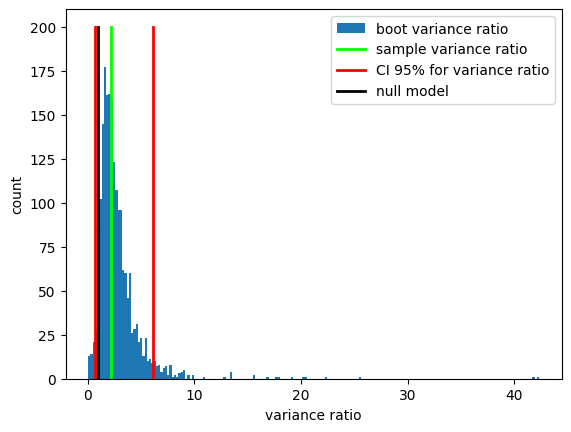

CI 95% for variance ratio = [0.7143 , 6.1667]
p-value = 0.0585


In [43]:
# compare variances using regular bootstrap for variance ratio

num_boots = 2000
N = len(cell1)

cell1_boot = np.random.choice(cell1,size = (N,num_boots))
cell2_boot = np.random.choice(cell2,size = (N,num_boots))

cell1_boot_vars = cell1_boot.var(axis = 0, ddof=1)
cell2_boot_vars = cell2_boot.var(axis = 0, ddof=1)

boot_var_ratio=cell1_boot_vars/cell2_boot_vars

ci95_boot = np.percentile(boot_var_ratio, [2.5,95.5])

plt.hist(boot_var_ratio, bins = 200, label = 'boot variance ratio')
plt.plot([cell1_var/cell2_var,cell1_var/cell2_var], [0,200], lw=2, color = 'lime', label = 'sample variance ratio')
plt.plot([ci95_boot[0],ci95_boot[0]], [0,200], color = 'red', lw=2, label = 'CI 95% for variance ratio')
plt.plot([ci95_boot[1],ci95_boot[1]], [0,200], color = 'red', lw=2)
plt.plot([1,1], [0,200], color = 'black', lw=2, label = 'null model')

plt.xlabel('variance ratio')
plt.ylabel('count')
plt.legend()
plt.show()

print('CI 95% for variance ratio = [{} , {}]'.format(round(ci95_boot[0],4),round(ci95_boot[1],4)))

p_value = sum(boot_var_ratio<=1)/num_boots
print('p-value = {}'.format(round(p_value,4)))


CI 95% for variance ratio = [0.7143 , 6.1667]
Fstat = 2.2059 . p-value = 0.1271


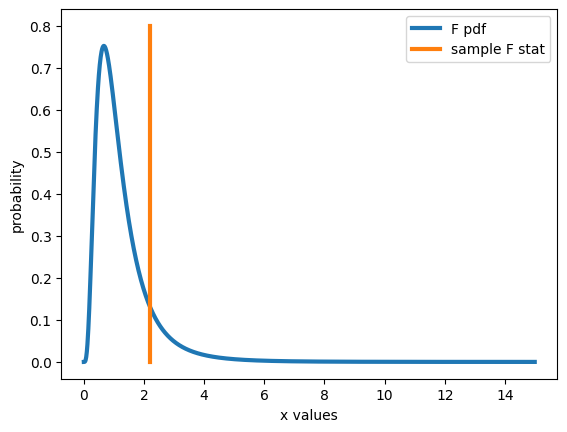

In [45]:
# compare variances using F distribution 

f_stat = cell1_var/cell2_var

ci95_F = f_stat*stats.f.ppf([0.025,0.975], N-1, N-1)
print('CI 95% for variance ratio = [{} , {}]'.format(round(ci95_boot[0],4),round(ci95_boot[1],4)))

p_value = 1-stats.f.cdf(f_stat,N-1,N-1)
print('Fstat = {} . p-value = {}'.format(round(f_stat,4) , round(p_value,4)))

plt.plot(np.arange(0,15,0.01), stats.f.pdf(np.arange(0,15,0.01),10,10), lw=3, label = 'F pdf')
plt.plot([f_stat,f_stat] , [0,0.8], lw = 3, label = 'sample F stat')  
plt.xlabel('x values')
plt.ylabel('probability')
plt.legend()
plt.show()


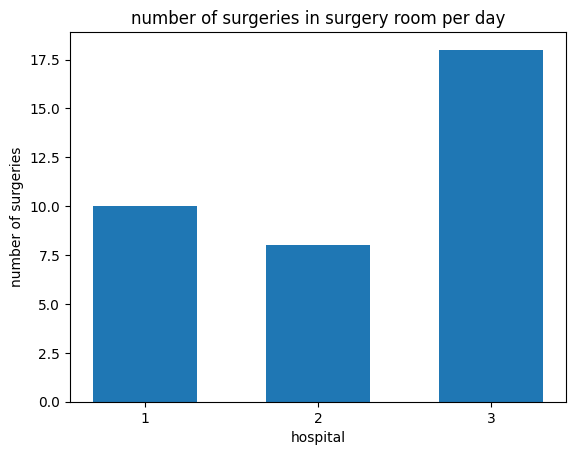

In [46]:
# example categorical data - chi2 test

num_surgeries = np.array([10, 8, 18])

plt.bar(np.arange(1,4), num_surgeries, width = 0.6)
plt.gca().set_xticks(np.array([1,2,3]),['1','2','3'])
plt.title('number of surgeries in surgery room per day')
plt.xlabel('hospital')
plt.ylabel('number of surgeries')
plt.show()


In [48]:
# chi2 test

O = num_surgeries
N = sum(O)
E = N/3*np.ones(3,)

df = len(O)-1

chi2_stat = sum((O-E)**2/E)

p_value = 1-stats.chi2.cdf(chi2_stat,df)
print('p-value = {}'.format(round(p_value,4)))


p-value = 0.097


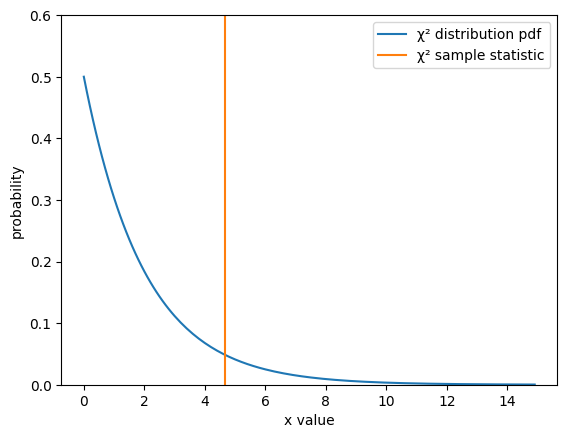

In [49]:
# plot chi2 distribution

x = np.arange(0,15,0.1)

plt.plot(x,stats.chi2.pdf(x,df), label = '\u03C7\u00b2 distribution pdf')
plt.plot([chi2_stat,chi2_stat],[0,0.6], label = '\u03C7\u00b2 sample statistic')
plt.xlabel('x value')
plt.ylabel('probability')
plt.ylim((0,0.6))
plt.legend(loc = 'upper right')
plt.show()

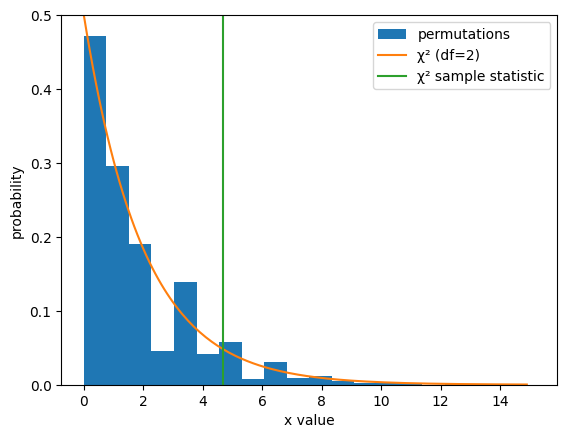

p-value = 0.1016


In [53]:
# build null model distribution using permutations

num_perms = 5000
O_permed = stats.multinomial.rvs(N,[1/3]*3, num_perms)
E_permed = np.tile(E,(num_perms,1))

O_E_permed = (O_permed-E_permed)**2/E_permed
chi2_stat_perm = O_E_permed.sum(axis=1)

plt.hist(chi2_stat_perm, bins = 20, density=True, label = 'permutations')
plt.plot(x,stats.chi2.pdf(x,df), label = '\u03C7\u00b2 (df=2)')
plt.plot([chi2_stat,chi2_stat],[0,0.5], label = '\u03C7\u00b2 sample statistic')
plt.xlabel('x value')
plt.ylabel('probability')
plt.ylim((0,0.5))
plt.legend(loc = 'upper right')
plt.show()

p_value_perm = sum(chi2_stat_perm>=chi2_stat)/num_perms
print('p-value = {}'.format(round(p_value_perm,4)))


In [22]:
# effect size categorical data Cramer's V

V = (chi2_stat/(N*df))**0.5

print('Cramers V = {}'.format(round(V,4)) )


Cramers V = 0.2546


In [126]:
# 2D categorical data 

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/parent_teen_education.csv'

data_edu = pd.read_csv(url)

print(data_edu)


  teen_education  parent_education  count
0        college     parent_degree    231
1     no college     parent_degree     49
2        college  parent_no_degree    214
3     no college  parent_no_degree    298


<ipython-input-127-bb7e0a5be643>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_edu_table = data_edu.pivot('teen_education','parent_education')


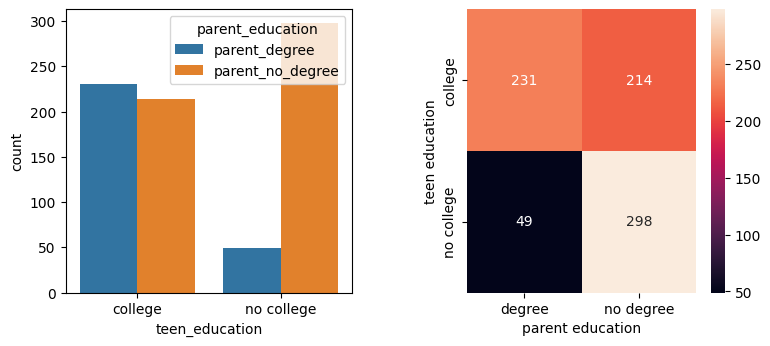

In [127]:
# presentation

fig,ax = plt.subplots(1,2)

sns.barplot(ax=ax[0],data=data_edu, x = 'teen_education', y ='count', hue = 'parent_education')

data_edu_table = data_edu.pivot('teen_education','parent_education')

sns.heatmap(data=data_edu_table,ax=ax[1], annot = True, fmt = '.0f',
            xticklabels = ['degree','no degree'])
ax[1].set_xlabel('parent education')
ax[1].set_ylabel('teen education')

fig.subplots_adjust( right=1.2, top=0.7, wspace=0.4, hspace=0.4)
plt.show()

In [145]:
# chi2 test

O = data_edu_table.values
print(O)

N_parent_degree = O.sum(axis=0)
N_teen_college = O.sum(axis=1)
N_total = O.sum()

print(N_parent_degree,N_teen_college,N_total)

E_parent_degree_teen_college = N_parent_degree[0]*N_teen_college[0]/N_total
E_parent_degree_teen_no_college = N_parent_degree[0]*N_teen_college[1]/N_total
E_parent_no_degree_teen_college = N_parent_degree[1]*N_teen_college[0]/N_total
E_parent_no_degree_teen_no_college = N_parent_degree[1]*N_teen_college[1]/N_total

print(E_parent_degree_teen_college)

chi_parent_degree_teen_college = (O[0,0]-E_parent_degree_teen_college)**2/E_parent_degree_teen_college
chi_parent_degree_teen_no_college = (O[1,0]-E_parent_degree_teen_no_college)**2/E_parent_degree_teen_no_college
chi_parent_no_degree_teen_college = (O[0,1]-E_parent_no_degree_teen_college)**2/E_parent_no_degree_teen_college
chi_parent_no_degree_teen_no_college = (O[1,1]-E_parent_no_degree_teen_no_college)**2/E_parent_no_degree_teen_no_college

print(chi_parent_degree_teen_college)

chi2_stat = chi_parent_degree_teen_college+chi_parent_degree_teen_no_college+chi_parent_no_degree_teen_college+chi_parent_no_degree_teen_no_college

print('chi2 stat = {}'.format(chi2_stat))



122.67676767676768

In [149]:
# better way

O = data_edu_table.values
print(O)

N_parent_degree = np.array([O.sum(axis=0)]) # make column vector
N_teen_college = np.array([O.sum(axis=1)]) # make row vector
N_total = O.sum()

E = N_parent_degree.T.dot(N_teen_college)/N_total
print(E)

chi2_stat - sum(((O-E.T)**2)/E)

print(chi2_stat)


[[231 214]
 [ 49 298]]
[[157.32323232 122.67676768]
 [287.67676768 224.32323232]]
121.82016837742447


p-value = 0.0


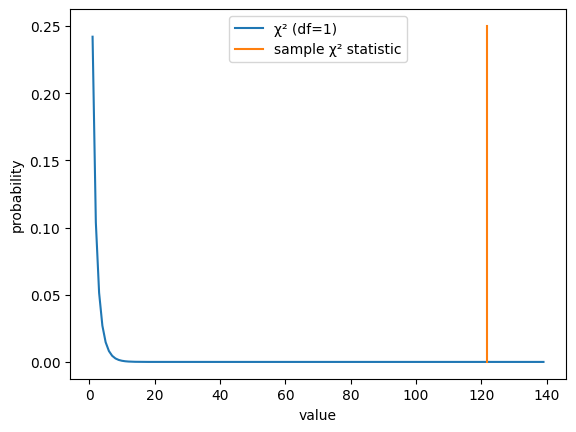

In [28]:
# calculate significance - p-value

df = (O.shape[0]-1)*(O.shape[1]-1)

O.shape[1]

p_value = 1-stats.chi2.cdf(chi2_stat,df)

print('p-value = {}'.format(round(p_value,4)))

plt.plot(np.arange(0,140), stats.chi2.pdf(np.arange(0,140),df), label = '\u03C7\u00b2 (df=1)')
plt.plot([chi2_stat,chi2_stat],[0,0.25], label = 'sample \u03C7\u00b2 statistic')
plt.xlabel('value')
plt.ylabel('probability')
plt.legend()
plt.show()


In [29]:
# effect size

V = (chi2_stat/(N_total*df))**0.5

print('Cramers V = {}'.format(round(V,4)) )



Cramers V = 0.3922
